# 4-1. 化合物の類似性

rdkitのインストール

In [ ]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 11.7 MB/s eta 0:00:00


ライブラリのインポート

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from rdkit import Chem

Google Driveへマウント

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Cheminformatics")
print(os.getcwd())

/content/drive/MyDrive/Cheminformatics


## 4-1-1. 類似度の計算

### データを使った例

トルエンとクロロベンゼンの例

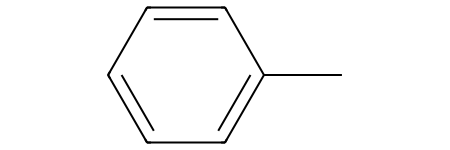

In [ ]:
smi1 = "Cc1ccccc1"
mol1 = Chem.MolFromSmiles(smi1)
mol1

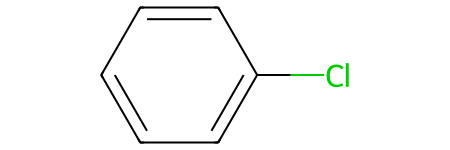

In [ ]:
smi2 = "Clc1ccccc1"
mol2 = Chem.MolFromSmiles(smi2)
mol2

In [ ]:
mols = [mol1, mol2]

In [ ]:
from rdkit.Chem import Draw

mols2 = [Chem.MolFromSmiles("O=C(O)COCCN1CCN(C(c2ccccc2)c2ccc(Cl)cc2)CC1"), Chem.MolFromSmiles("OCCOCCN1CCN(C(c2ccccc2)c2ccc(Cl)cc2)CC1")]
img = Draw.MolsToGridImage(mols2, molsPerRow=2, subImgSize=(300, 300),
                           legends=["Cetirizine", "Hydroxyzine"])

MACCS Keysの算出

In [ ]:
from rdkit.Chem import MACCSkeys

fps_maccs = [MACCSkeys.GenMACCSKeys(m) for m in mols]
fps_array_maccs = np.asarray(fps_maccs)
fps_array_maccs.shape

(2, 167)

In [ ]:
fps_array_maccs

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Tanimoto係数で類似度を算出

In [ ]:
from rdkit import DataStructs
DataStructs.TanimotoSimilarity(fps_maccs[0], fps_maccs[1])

0.375

## 4-1-2. 距離の計算

In [ ]:
from scipy.spatial import distance

dist_euclidean = distance.euclidean(fps_maccs[0], fps_maccs[1])
print(f"ユークリッド距離: {dist_euclidean:.4}")

dist_cityblock = distance.cityblock(fps_maccs[0], fps_maccs[1])
print(f"マンハッタン距離: {dist_cityblock}")

ユークリッド距離: 2.236
マンハッタン距離: 5


In [ ]:
dist = distance.pdist(fps_maccs, metric="euclidean")
distance.squareform(dist)

array([[0.        , 2.23606798],
       [2.23606798, 0.        ]])

## 4-1-3. 類似度と距離の比較

In [ ]:
array1 = np.array([1, 1, 0, 0, 0])
array2 = np.array([0, 1, 0, 0, 0])

dist_euclidean = distance.euclidean(array1, array2)
print(f"ユークリッド距離: {dist_euclidean:.4}")

dist_cityblock = distance.cityblock(array1, array2)
print(f"マンハッタン距離: {dist_cityblock}")

tanimoto_index = 1/2
print(f"Tanimoto係数: {tanimoto_index}")

ユークリッド距離: 1.0
マンハッタン距離: 1
Tanimoto係数: 0.5


In [ ]:
array1 = np.array([1, 1, 1, 1, 1])
array2 = np.array([0, 1, 1, 1, 1])

dist_euclidean = distance.euclidean(array1, array2)
print(f"Distance Euclidean: {dist_euclidean:.4}")

dist_cityblock = distance.cityblock(array1, array2)
print(f"Distance Manhattan: {dist_cityblock}")

tanimoto_index = 4/5
print(f"Tanimoto Index: {tanimoto_index}")

Distance Euclidean: 1.0
Distance Manhattan: 1
Tanimoto Index: 0.8


## 4-1-4. フィンガープリントの違いによる類似度の違い

MACCS KeysとMorganフィンガープリントで算出したTanimoto係数

In [ ]:
fps_maccs = [MACCSkeys.GenMACCSKeys(mol) for mol in mols]
dist_maccs = DataStructs.TanimotoSimilarity(fps_maccs[0], fps_maccs[1])
print(f"MACCS KeysでのTanimoto係数: {dist_maccs}")

from rdkit.Chem import rdFingerprintGenerator

mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=4, fpSize=1024)
fps_morgan = [mfpgen.GetFingerprint(m) for m in mols]
dist_morgan = DataStructs.TanimotoSimilarity(fps_morgan[0], fps_morgan[1])
print(f"MorganフィンガープリントでのTanimoto係数: {dist_morgan}")

MACCS KeysでのTanimoto係数: 0.375
MorganフィンガープリントでのTanimoto係数: 0.3684210526315789


In [ ]:
dist_maccs = DataStructs.DiceSimilarity(fps_maccs[0], fps_maccs[1])
print(f"MACCS KeysでのDice類似度: {dist_maccs}")

dist_morgan = DataStructs.DiceSimilarity(fps_morgan[0], fps_morgan[1])
print(f"MorganフィンガープリントでのDice類似度: {dist_morgan}")

MACCS FingerprintでのDice Similarity: 0.5454545454545454
Morgan FingerprintでのDice Similarity: 0.5384615384615384


# 4-1. ケミカルスペース

## 4-1-1. 次元圧縮法

### PCA（主成分分析）

In [ ]:
df = pd.read_csv("logS_train.csv", index_col=0)
df = df.iloc[:, 1:]
df.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
TRAINING SET INDEX,,,,,,,,,,,,,,,,,,,,,
1,5.614081,5.614081,0.597236,-2.726796,0.327494,12.074074,466.479,446.319,465.990822,150,...,0,0,0,0,0,0,0,0,0,0
2,11.942019,11.942019,0.161193,-0.588430,0.760294,41.318182,302.458,272.218,302.224580,122,...,0,0,0,0,0,0,0,0,0,0
3,2.248843,2.248843,1.232824,1.232824,0.546961,14.000000,154.212,144.132,154.078250,58,...,0,0,0,0,0,0,0,0,0,0
4,2.178241,2.178241,1.342593,1.342593,0.463217,12.666667,152.196,144.132,152.062600,56,...,0,0,0,0,0,0,0,0,0,0
5,11.169907,11.169907,0.347654,-2.920139,0.633379,16.000000,183.169,173.089,183.012449,61,...,0,0,0,0,0,0,0,0,0,0


欠損値の除外

In [ ]:
# 欠損値がある列を除外
df_nonan = df.dropna(axis=1)
print(df_nonan.shape)

(658, 198)


変数の標準化

In [ ]:
from sklearn.preprocessing import StandardScaler

# 列の値を標準化
scaler = StandardScaler()
X = scaler.fit_transform(df_nonan)

X = pd.DataFrame(X, index=df_nonan.index, columns=df_nonan.columns)
X.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
TRAINING SET INDEX,,,,,,,,,,,,,,,,,,,,,
1,-1.250403,-1.250403,0.781405,-1.476298,-1.735383,-0.358270,2.473165,2.490936,2.484514,2.023308,...,-0.141968,-0.236244,-0.087504,-0.095929,0.0,-0.11094,0.0,-0.067677,-0.157389,-0.311102
2,0.745595,0.745595,-0.472951,0.078354,0.940113,2.089164,0.648139,0.475189,0.654387,1.137817,...,-0.141968,-0.236244,-0.087504,-0.095929,0.0,-0.11094,0.0,-0.067677,-0.157389,-0.311102
3,-2.311888,-2.311888,2.609790,1.402457,-0.378676,-0.197090,-1.001363,-1.007795,-1.001184,-0.886165,...,-0.141968,-0.236244,-0.087504,-0.095929,0.0,-0.11094,0.0,-0.067677,-0.157389,-0.311102
4,-2.334157,-2.334157,2.925559,1.482262,-0.896365,-0.308676,-1.023794,-1.007795,-1.023709,-0.949414,...,-0.141968,-0.236244,-0.087504,-0.095929,0.0,-0.11094,0.0,-0.067677,-0.157389,-0.311102
5,0.502051,0.502051,0.063438,-1.616864,0.155545,-0.029710,-0.679165,-0.672530,-0.677837,-0.791291,...,-0.141968,-0.236244,-0.087504,-0.095929,0.0,-0.11094,0.0,-0.067677,-0.157389,-0.311102


### 4-1-1-1.主成分分析（PCA）

In [ ]:
from sklearn.decomposition import PCA #主成分分析器

n_comp = 5

#主成分分析の実行
pca = PCA(n_components=n_comp)
pca.fit(X)

res = pca.transform(X)
print(res.shape)

(658, 5)


寄与率

In [ ]:
df_contribution = pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(n_comp)], columns=["Contribution"])
df_contribution

,Contribution
PC1,0.171207
PC2,0.096316
PC3,0.063376
PC4,0.049845
PC5,0.037944


結果を散布図で可視化

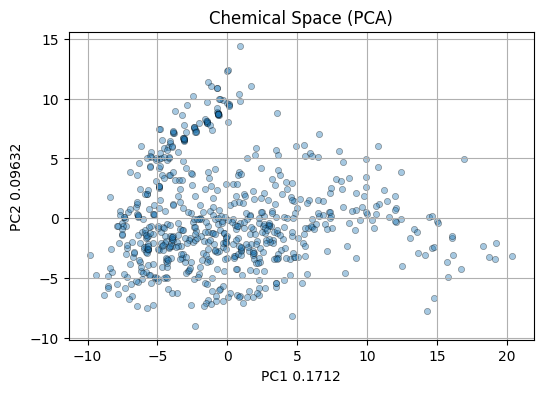

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(res[:, 0], res[:, 1],
            alpha=0.4, s=20, linewidth=0.5, edgecolors="k")
plt.xlabel(f"PC1 {df_contribution.iloc[0, 0]:.4}")
plt.ylabel(f"PC2 {df_contribution.iloc[1, 0]:.4}")
plt.title("Chemical Space (PCA)")
plt.grid()
plt.show()

Loading Plot

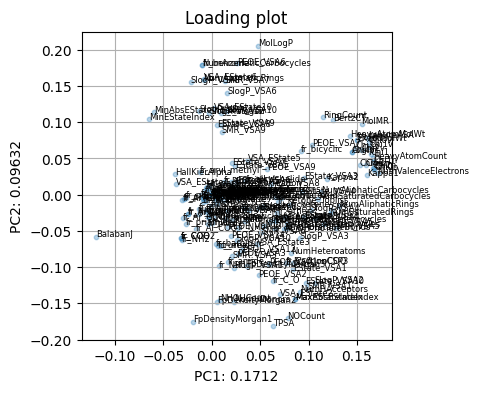

In [ ]:
loading = pd.DataFrame(pca.components_.T, index=X.columns, columns=["PC{}".format(x + 1) for x in range(n_comp)])

plt.figure(figsize=(4, 4))
plt.scatter(loading.iloc[:, 0], loading.iloc[:, 1], s=10, alpha=0.3)
for i in range(len(X.columns)):
  plt.text(loading.iloc[i, 0], loading.iloc[i, 1], loading.index[i], size=6)
plt.title("Loading plot")
plt.xlabel(f"PC1: {pca.explained_variance_ratio_[0]:.4}")
plt.ylabel(f"PC2: {pca.explained_variance_ratio_[1]:.4}")
plt.grid()
plt.show()

### 4-1-1-2. t-SNE

In [ ]:
#t-SNEで次元削減
from sklearn.manifold import TSNE

# t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=100, n_iter=1000)
res = tsne.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


結果を散布図に可視化

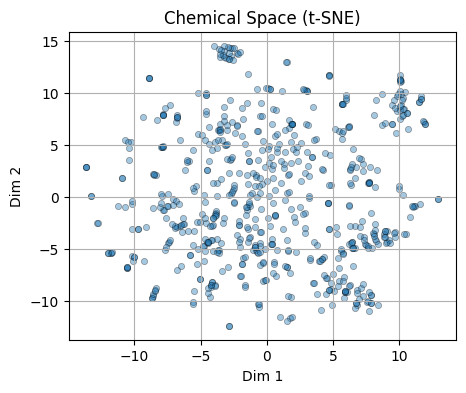

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(res[:, 0], res[:, 1],
            alpha=0.4, s=20, linewidth=0.5, edgecolors='k')
plt.title("Chemical Space (t-SNE)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid()
plt.show()

### 4-1-1-3. UMAP

In [ ]:
pip install umap-learn

In [ ]:
from umap import UMAP

umap = UMAP(random_state=0)
res = umap.fit_transform(X)
print(res.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(658, 2)


結果を散布図で可視化

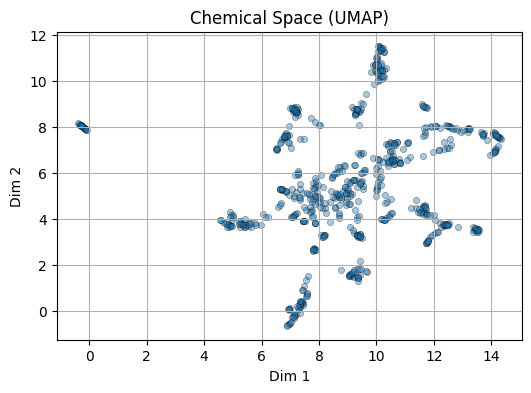

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(res[:, 0], res[:, 1],
            alpha=0.4, s=20, linewidth=0.5, edgecolors='k')
plt.title("Chemical Space (UMAP)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid()
plt.show()

# 4-3. クラスタリング

## 4-3-1. 階層的クラスタリング

In [ ]:
import random
random.seed(1111)

rs = random.sample(range(len(X)), 20)
X20 = X.iloc[rs, :]

単純連結法

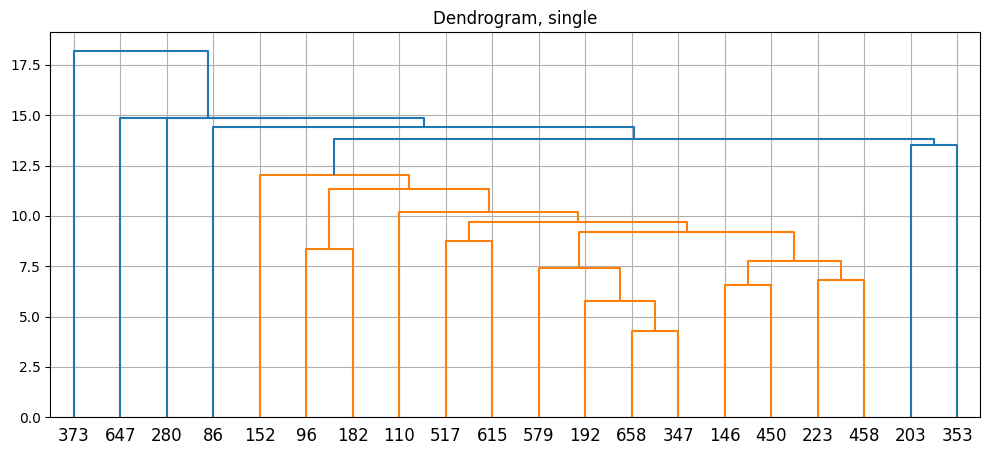

In [ ]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X20, method="single")

plt.figure(figsize=(12, 5))
plt.title("Dendrogram, single")
hierarchy.dendrogram(Z, labels=X20.index)
plt.grid()
plt.show()

完全連結法

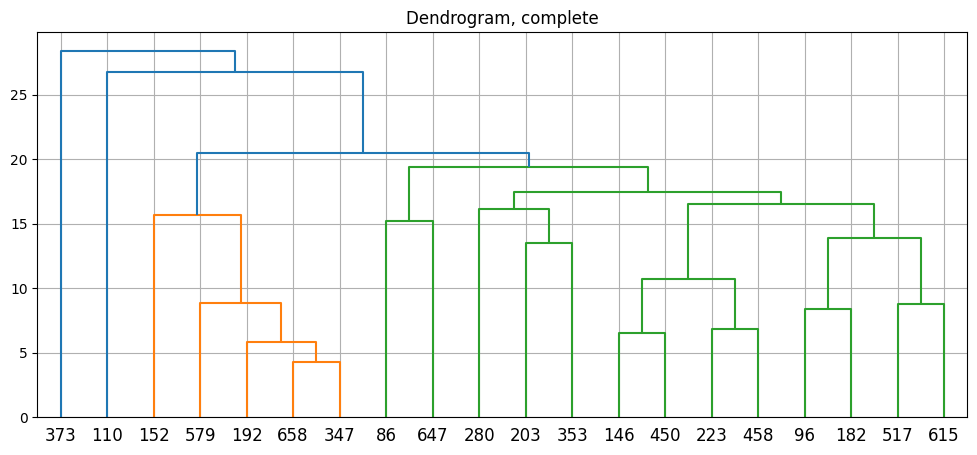

In [ ]:
Z = hierarchy.linkage(X20, method="complete")

plt.figure(figsize=(12, 5))
plt.title("Dendrogram, complete")
hierarchy.dendrogram(Z, labels=X20.index)
plt.grid()
plt.show()

Ward法

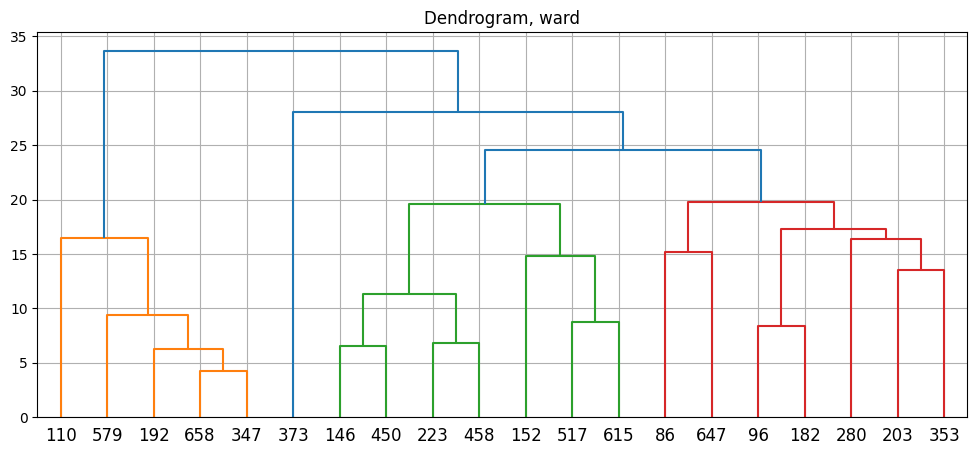

In [ ]:
Z = hierarchy.linkage(X20, method="ward")

plt.figure(figsize=(12, 5))
plt.title("Dendrogram, ward")
hierarchy.dendrogram(Z, labels=X20.index)
plt.grid()
plt.show()

## 4-3-2. 非階層的クラスタリング

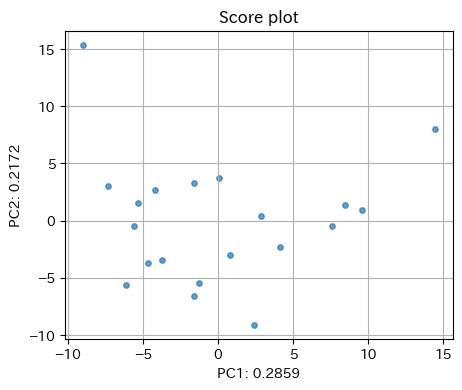

In [ ]:
pca = PCA(n_components=2)
res = pca.fit_transform(X20)

plt.figure(figsize=(5, 4))
plt.scatter(res[:, 0], res[:, 1], s=15, alpha=0.7)
plt.title("Score plot")
plt.xlabel(f"PC1: {pca.explained_variance_ratio_[0]:.4}")
plt.ylabel(f"PC2: {pca.explained_variance_ratio_[1]:.4}")
plt.grid()
plt.show()

K-means法の実行

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(3, random_state=0)
model.fit(X20)
print(model.labels_)

[2 0 0 1 2 0 2 0 0 1 0 2 1 1 2 2 2 1 0 0]


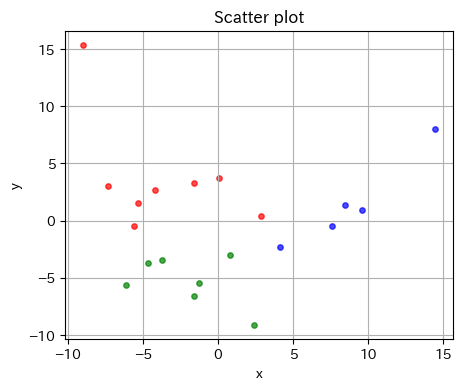

In [ ]:
color = ["r", "b", "g"]

fig = plt.figure(figsize=(5, 4))
for i in range(3):
  p = res[model.labels_==i, :]
  plt.scatter(p[:, 0], p[:, 1], color=color[i], s=15, alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title("Scatter plot")
plt.show()

エルボー法

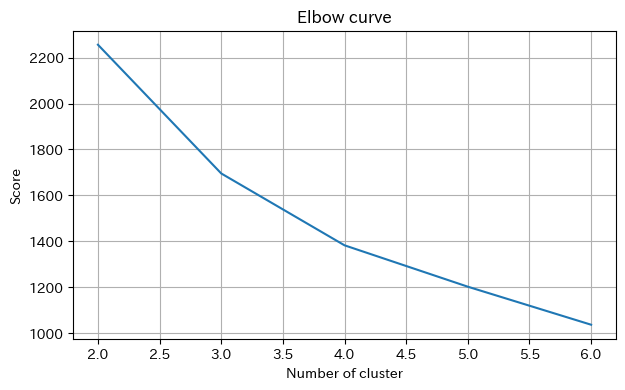

In [ ]:
scores = []

for k in range(2, 7):
  #k個のクラスタに分けるモデルを作成
  model = KMeans(k, random_state=0)
  model.fit(X20)
  scores.append(model.inertia_)

fig = plt.figure(figsize=(7, 4))
plt.plot(range(2, 7), scores)
plt.xlabel("Number of cluster")
plt.ylabel("Score")
plt.title("Elbow curve")
plt.grid()
plt.show()